In [264]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

In [76]:
%matplotlib inline

In [102]:
seoul = pd.read_csv('corona.csv',encoding='utf-8')
seoul
seoul = seoul.drop(['환자번호','국적','조치사항','환자정보'],axis=1)

In [108]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic') 

In [78]:
# 'yy-mm-dd' 형식으로 확진일 데이터 변환함수
def rename_date(d):
    yy,mm,dd,temp = d.split('.')
    if len(mm) == 1 and len(dd) == 1:
        return yy + '-' + '0' + mm + '-' + '0' + dd
    
    elif len(mm) == 1 and len(dd) == 2:
        return yy + '-' + '0' + mm + '-' + dd
    
    elif len(mm) == 2 and len(dd) == 1:
        return yy + '-' + mm + '-' + '0' + dd
    
    else:
        return yy + '-' + mm + '-' + dd

# 확진일자 변환함수
def virus_confirmed(d):
    yy,mm,dd = d.split('-')
    return yy+'년'+mm+'월'
# ex) 21.01.04. = 2101 ,,, 20.12.23. = 2012

In [79]:
# 확진일을 str타입으로 변경 후, YY-MM-DD 형식으로 변경. (후에 pd.to_datetime 사용하여 날짜형식 데이터로 변경하기 위함)
seoul['확진일'] = seoul['확진일'].astype(str)
seoul['확진일'] = seoul['확진일'].apply(rename_date)

In [80]:
# 확진연월 칼럼추가, 확진일에서 년도, 월 데이터를 꺼내는 함수 사용
seoul['확진연월'] = seoul['확진일'].apply(virus_confirmed)

# 연도, 월 별로 그룹화
months_group = seoul.groupby('확진연월')

In [81]:
print(months_group['확진일'].count())

확진연월
20년01월        7
20년02월       80
20년03월      391
20년04월      156
20년05월      228
20년06월      460
20년07월      281
20년08월     2417
20년09월     1304
20년10월      733
20년11월     2909
20년12월    10397
21년01월      975
Name: 확진일, dtype: int64


In [82]:
df_monthsgroup = pd.DataFrame(months_group['확진일'].count())
df_monthsgroup

,확진일
확진연월,
20년01월,7
20년02월,80
20년03월,391
20년04월,156
20년05월,228
20년06월,460
20년07월,281
20년08월,2417
20년09월,1304


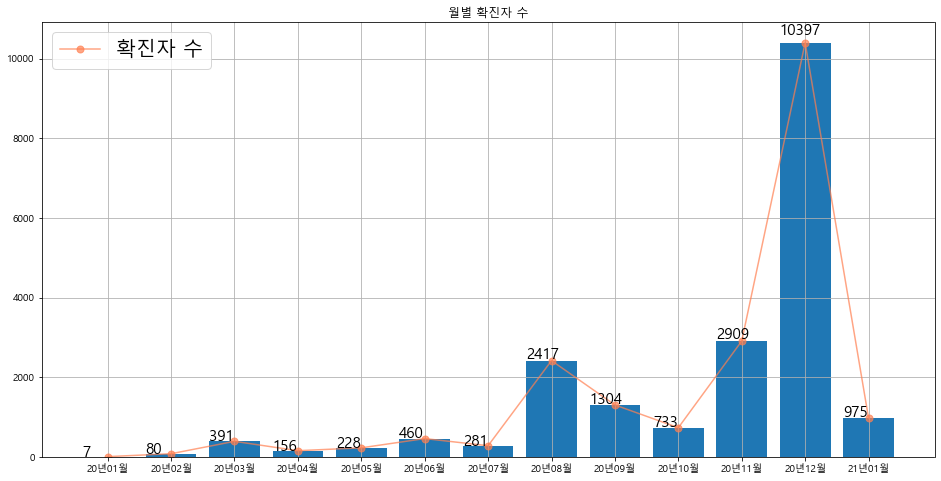

In [286]:
plt.figure(figsize=(16,8))
months_graph = df_monthsgroup.reset_index(drop=False, inplace=False)
ax=plt.bar(months_graph['확진연월'],months_graph['확진일'])
ax2=plt.plot(months_graph['확진연월'],months_graph['확진일'],'-o',color='coral', markersize=7, alpha=0.7)
for p in ax.patches:
    x,y,weight,height = p.get_bbox().bounds
    plt.text(x,height*1.02,int(height),fontsize=15,color='black')
plt.legend(['확진자 수'],fontsize=20,loc='upper left')
plt.title('월별 확진자 수')
plt.grid(True)

In [84]:
# 날짜형식으로 확진일 데이터 변경
seoul['확진일']=pd.to_datetime(seoul['확진일'],format='%y-%m-%d')

In [85]:
seoul

,연번,확진일,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,확진연월
0,20338,2021-01-04,영등포구,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월
1,20337,2021-01-04,타시도,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월
2,20336,2021-01-04,서대문구,우크라이나,해외유입,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월
3,20335,2021-01-04,노원구,NaN,타시도 확진자 접촉(경기이천시물류센터관련),NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월
4,20334,2021-01-04,영등포구,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월
...,...,...,...,...,...,...,...,...,...,...,...
20333,5,2020-01-31,성북구,NaN,#5 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월
20334,4,2020-01-30,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월
20335,3,2020-01-30,종로구,NaN,#3 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월
20336,2,2020-01-30,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월


In [86]:
anniversary = [['2020-02-14','Valentine',0],['2020-03-14','Whiteday',0],['2020-04-30','Buddha`s Birthday',0],['2020-05-05','Children`s Day',0],['2020-09-01','Chuseok',0],['2020-10-31','Halloween Day',0],['2020-12-25','Christmas',0]]
for id, (ymd, name,cnt) in enumerate(anniversary):
    ymd = pd.to_datetime(ymd)
    ymd_plus_2week = ymd + pd.DateOffset(days=14)
    anniversary[id][2]=seoul[(seoul['확진일'] > ymd)&(seoul['확진일'] <= ymd_plus_2week)]['확진일'].count()

In [87]:
anniversary

[['2020-02-14', 'Valentine', 70],
 ['2020-03-14', 'Whiteday', 165],
 ['2020-04-30', 'Buddha`s Birthday', 91],
 ['2020-05-05', 'Children`s Day', 115],
 ['2020-09-01', 'Chuseok', 693],
 ['2020-10-31', 'Halloween Day', 677],
 ['2020-12-25', 'Christmas', 3269]]

In [88]:
df_anniversary = pd.DataFrame(anniversary)
df_anniversary.columns = ['날짜','기념일 명','확진자 수']
df_anniversary = df_anniversary.set_index('기념일 명')
df_anniversary

,날짜,확진자 수
기념일 명,,
Valentine,2020-02-14,70
Whiteday,2020-03-14,165
Buddha`s Birthday,2020-04-30,91
Children`s Day,2020-05-05,115
Chuseok,2020-09-01,693
Halloween Day,2020-10-31,677
Christmas,2020-12-25,3269


In [89]:
confirmed_virus = df_anniversary['확진자 수']
confirmed_virus

기념일 명
Valentine              70
Whiteday              165
Buddha`s Birthday      91
Children`s Day        115
Chuseok               693
Halloween Day         677
Christmas            3269
Name: 확진자 수, dtype: int64

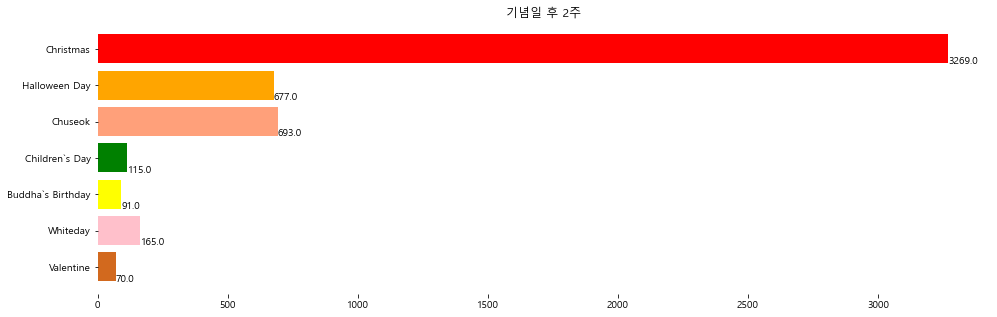

In [112]:
colors=['chocolate','pink','yellow','green','lightsalmon','orange','red']
plt.figure(figsize=(16,5))
ax=plt.barh(df_anniversary.index,confirmed_virus, tick_label=df_anniversary.index, height=0.8, color=colors)
plt.title('기념일 후 2주')

for p in ax.patches:
    x,y,cnt,height = p.get_bbox().bounds
    plt.text(cnt,y,cnt,fontsize=10,color='black',ha='left')

plt.box(False)
plt.show()

In [234]:
def what_day(ymd):
    ymd = pd.to_datetime(ymd)
    days = ['월', '화', '수', '목', '금', '토', '일']
    return days[ymd.dayofweek]

seoul['확진요일'] = seoul['확진일'].apply(what_day)
seoul.tail(10)

,연번,확진일,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,확진요일
20328,10,20.2.5.,성북구,NaN,#6 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,일
20329,9,20.2.5.,송파구,싱가포르,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,일
20330,8,20.2.2.,타시도,우한 교민,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,수
20331,7,20.1.31.,종로구,NaN,#6 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,월
20332,6,20.1.31.,종로구,NaN,#6 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,월
20333,5,20.1.31.,성북구,NaN,#5 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,월
20334,4,20.1.30.,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,일
20335,3,20.1.30.,종로구,NaN,#3 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,일
20336,2,20.1.30.,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,일
20337,1,20.1.24.,강서구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,토


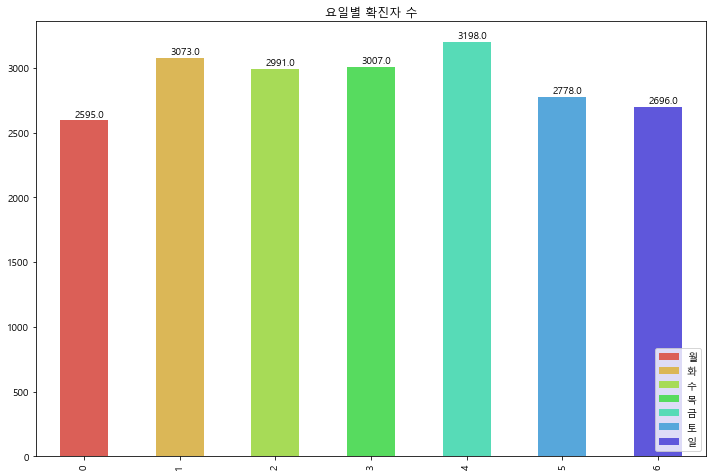

In [237]:
days_group = seoul.groupby('확진요일')
days_group_cnt = days_group['확진요일'].count()
df_days_group = pd.DataFrame(days_group_cnt)
df_days_group = df_days_group.loc[['월','화','수','목','금','토','일'], :]
df_days_group['확진자'] = df_days_group['확진요일']
del df_days_group['확진요일']
df_days_group.reset_index(drop=False, inplace=True)

ax = df_days_group.plot(kind='bar', figsize=(12,8))
ax = plt.bar(df_days_group['확진요일'],df_days_group['확진자'], color=colors, width=0.5)
for p in ax.patches:
    x,y,weight,height = p.get_bbox().bounds
    plt.text(x+0.15,height*1.01,height,fontsize=10,color='black')
    plt.title('요일별 확진자 수')
plt.legend(handles=bars, labels=list(df_days_group['확진요일']), fontsize=10, loc='lower right')

In [246]:
import requests  #웹페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup #HTML을 파싱하는 모듈
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_driver = './chromedriver'
driver = webdriver.Chrome(chrome_driver)

url = 'http://ncov.mohw.go.kr/bdBoardList_Real.do'
driver.get(url)

source = driver.page_source
ages_datatable = source

# BeautifulSoup 활용하여 페이지소스를 받아옴.
soup_ages = BeautifulSoup(ages_datatable)

# 오늘 날짜 SELECT
today_date = soup_ages.select('div.content div div div.fl_l h5.s_title_in3 span.title_info')
today_date = today_date[0].text.replace('.','/')
print(today_date[1:11])

# 성별, 나이데이터를 age에 받아옴.
age = soup_ages.select('div.data_table table.num tr td span')

# 오늘의 확진자 성별데이터, 확진자 나이데이터 깔끔하게 정리
virusconfirmed_sexdata=[]
virusconfirmed_agedata=[]

sex_list=['남성','여성']
age_list=['어린이','10대','20대','30대','40대','50대','60대','70대','80>=대']
sex_i, age_i = 0,0
for i in range(0,len(age),5):
    if i<6:
        virusconfirmed_sexdata.append([sex_list[sex_i],age[i].text.replace(',','')])
        sex_i+=1
    else:
        virusconfirmed_agedata.append([age_list[age_i],age[i].text.replace(',','')])
        age_i+=1


# 데이터 확인코드
for i in virusconfirmed_sexdata:
    print(i)
print()
for i in virusconfirmed_agedata:
    print(i)

with open('today_vc_sexdata.csv','w',encoding='utf-8') as file:
    file.write('성별,확진자\n')
    for i in virusconfirmed_sexdata:
        file.write('{},{}\n'.format(i[0],i[1]))

with open('today_vc_agedata.csv','w',encoding='utf-8') as file:
    file.write('연령대,확진자\n')
    for i in virusconfirmed_agedata:
        file.write('{},{}\n'.format(i[0],i[1]))

1/7 00시 기준
['남성', '32643']
['여성', '34043']

['어린이', '3336']
['10대', '5204']
['20대', '10555']
['30대', '12513']
['40대', '9521']
['50대', '8515']
['60대', '10483']
['70대', '4185']
['80>=대', '2374']


In [247]:
today_sexvcdata_df = pd.read_csv('today_vc_sexdata.csv', encoding='utf-8')
today_agevcdata_df = pd.read_csv('today_vc_agedata.csv', encoding='utf-8')

In [248]:
today_sexvcdata_df

,성별,확진자
0,남성,32643
1,여성,34043


In [249]:
today_agevcdata_df

,연령대,확진자
0,어린이,3336
1,10대,5204
2,20대,10555
3,30대,12513
4,40대,9521
5,50대,8515
6,60대,10483
7,70대,4185
8,80>=대,2374


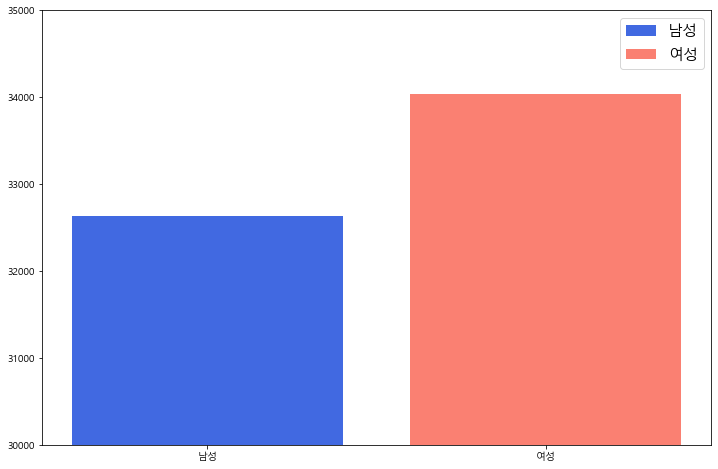

In [250]:
plt.figure(figsize=(12,8))
bars = plt.bar(today_sexvcdata_df['성별'], today_sexvcdata_df['확진자'], color=['royalblue','salmon'])
plt.ylim(30000,35000)
plt.legend(handles=bars, labels=list(today_sexvcdata_df['성별']), fontsize=15)

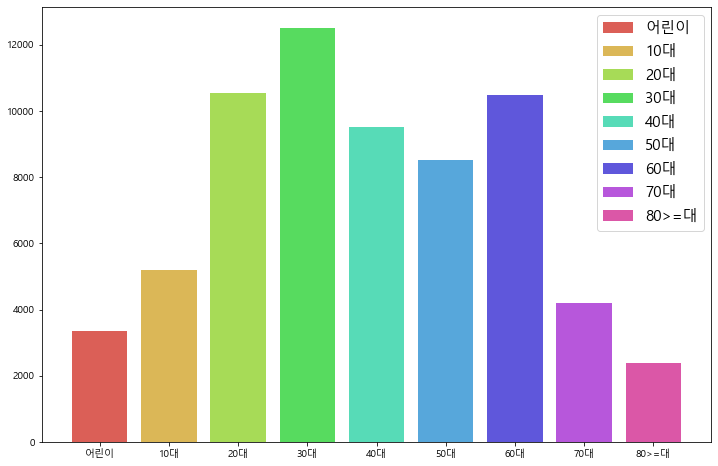

In [251]:
import seaborn as sns

plt.figure(figsize=(12,8))
colors=sns.color_palette('hls',len(today_agevcdata_df))
bars = plt.bar(today_agevcdata_df['연령대'], today_agevcdata_df['확진자'], color=colors)

#plt.ylim()
plt.legend(handles=bars, labels=list(today_agevcdata_df['연령대']), fontsize=15)